---
title: "Régression linéaire simple avec Python"
author: "Jason Suárez"
date: "2024-01-30"
categories: ["Data Science", "Python"]
image: "image.png"
draft: false
---

Les données sont disponibles sur [Kaggle](https://www.kaggle.com/andonians/random-linear-regression). Il s'agit d'un ensemble de données de régression linéaire aléatoire avec 2 variables. Bien que très simple, il est idéal pour illustrer le fonctionnement de la régression linéaire. 

Le but de ce notebook est de construire un modèle de régression linéaire en Python et sans aucune librairie pour prédire la variable dépendante `y` à partir de la variable indépendante `x`.

In [34]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *


## Chargement et visualisation des données

Grâce à la librairie `pandas`, nous pouvons charger les données depuis un fichier CSV et les stocker dans un DataFrame. Nous pouvons ensuite visualiser les données avec la librairie `matplotlib`.

In [35]:

dataset = pd.read_csv('data/train.csv')
dataset.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


La méthode `head()` permet d'afficher les 5 premières lignes du DataFrame.
Et la méthode `describe()` permet d'afficher des statistiques descriptives sur les données.

Ces deux méthodes sont très utiles pour avoir un aperçu des données.


In [36]:
dataset.describe()


,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


Il est primordial de comprendre les données avant de commencer à les analyser. Il faut donc visualiser les données pour voir s'il y a des relations entre les variables et/ou des valeurs aberrantes ou manquantes.


In [37]:
dataset.isna().values.any()

True

Comme nous sommes en présence de données manquantes, nous devons les gérer avant de commencer à construire notre modèle. Il existe plusieurs méthodes pour gérer les données manquantes. Dans un prochain notebook nous verrons les différentes méthodes pour gérer les données manquantes. Pour l'heure nous allons simplement supprimer les lignes qui contiennent des données manquantes.



In [38]:
dataset = dataset.dropna()

In [39]:
dataset.isna().values.any()

False

Ici, nous avons deux variables : la variable indépendante `X` et la variable dépendante `y`. Nous pouvons visualiser les données avec un nuage de points.

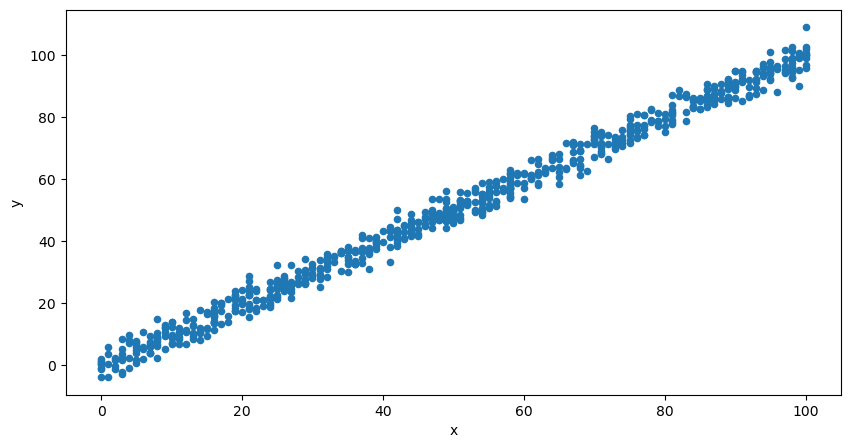

In [54]:
dataset.plot(kind="scatter", x="x", y="y", figsize=(10,5))
plt.show()

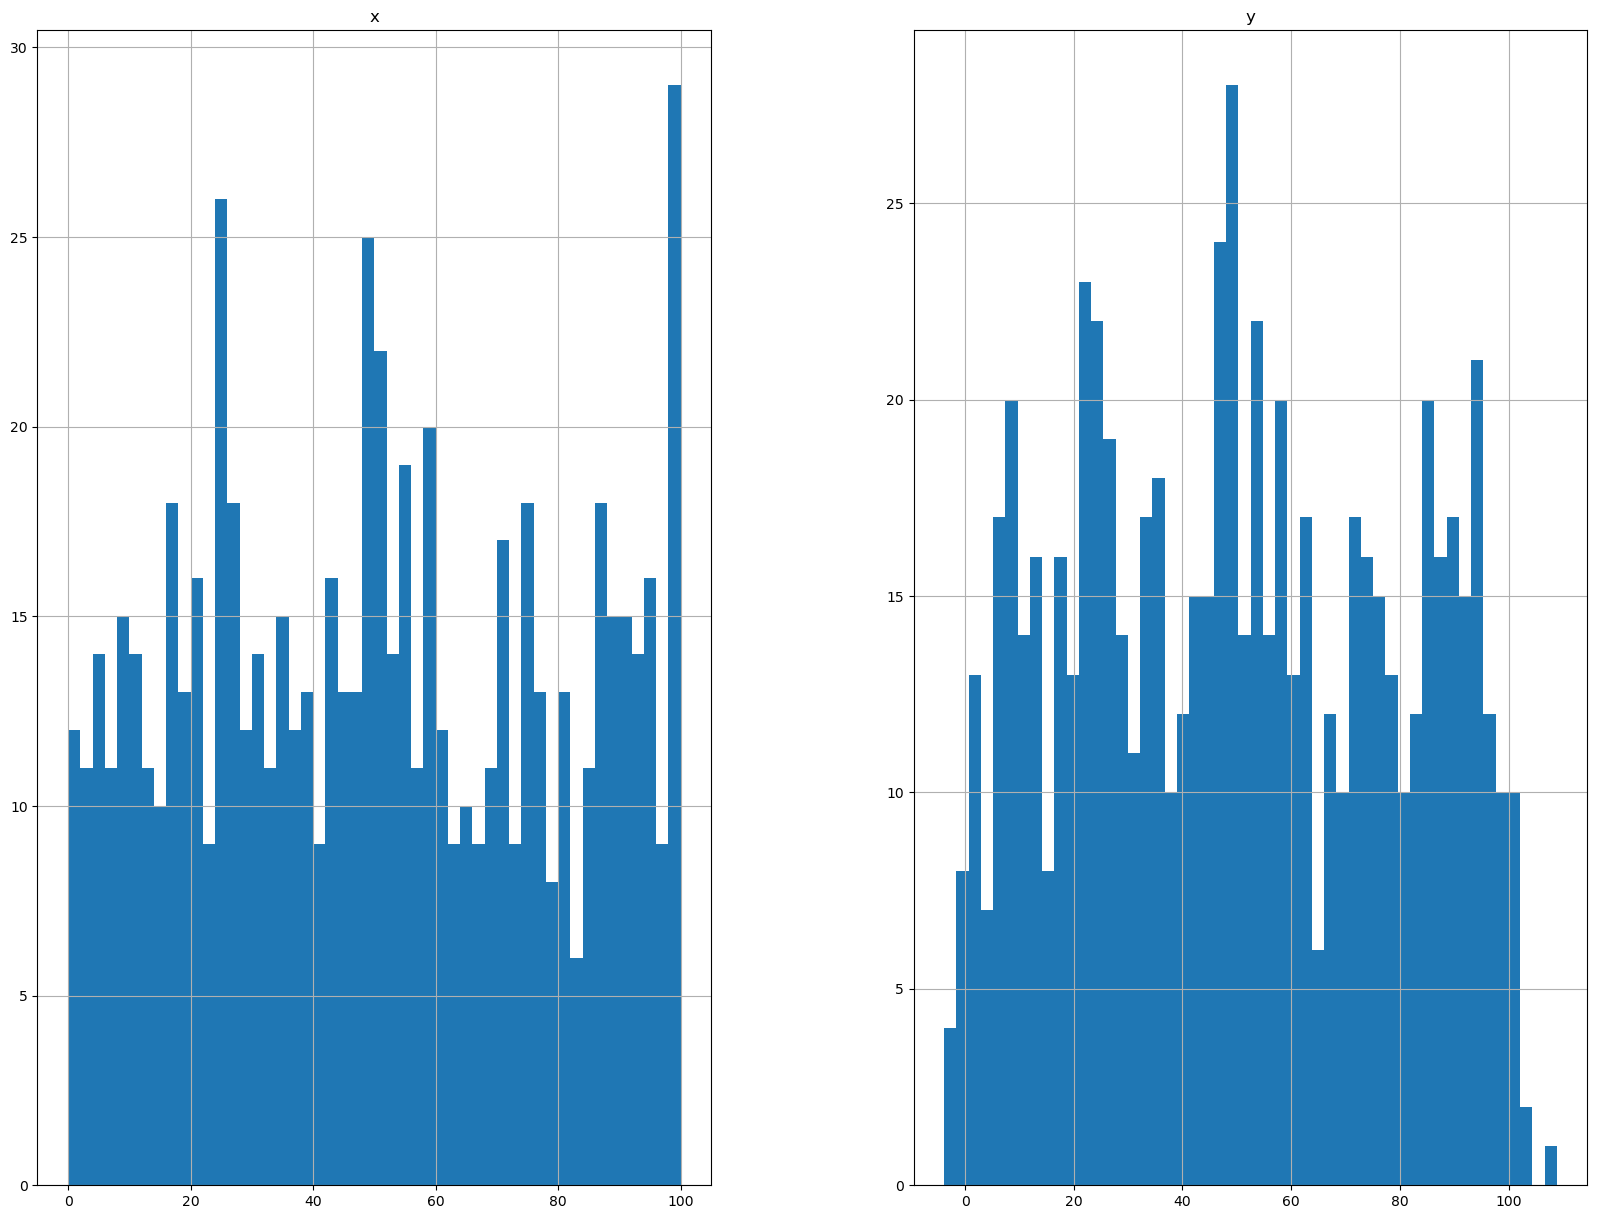

In [40]:
# Plotting the distribution of the data
dataset.hist(bins=50, figsize=(20,15))
plt.show()


In [41]:
# Plotting the correlation matrix
corr_matrix = dataset.corr()
corr_matrix['y'].sort_values(ascending=False)

y    1.00000
x    0.99534
Name: y, dtype: float64

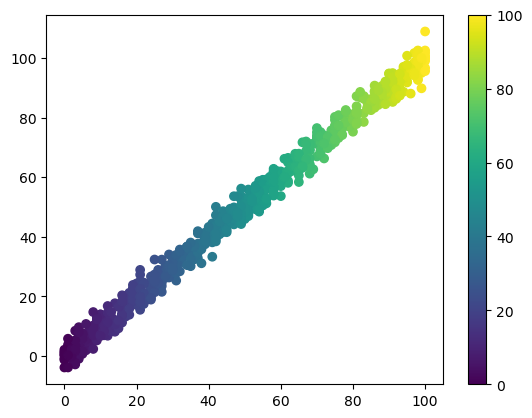

In [42]:
# Plot the X points in one color and the Y points in another color
# to see the difference between the two
plt.scatter(dataset['x'], dataset['y'], c=dataset['x'], cmap='viridis')
plt.colorbar()
plt.show()


## Préparation des données

- Séparation des données en deux variables : variable indépendante `X` et variable dépendante `y`
- Conversion des données en tableaux Numpy

In [43]:
columns = dataset.columns
columns

Index(['x', 'y'], dtype='object')

In [44]:
X_full = dataset.x.to_numpy()
y_full = dataset.y.to_numpy()

### Division des données en données d'entraînement et données de test puis en données d'entraînement et données de validation

In [45]:
X_train, X_val, y_train, y_val = dataset_splitter(X_full, y_full, 0.4)
X_val, y_val, X_test, y_test = dataset_splitter(X_val, y_val, 0.5)

X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
train_size: 60.0% - test_size: 40.0%
X_train: 60%
X_val: 40%
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
train_size: 50.0% - test_size: 50.0%
X_train: 50%
X_val: 50%


### Standardisation des données
Cette étape est importante car elle permet d'éviter que certaines variables aient plus d'importance que d'autres dans le modèle. En effet, si une variable est exprimée en milliers et une autre en unités, la variable exprimée en milliers aura plus d'importance dans le modèle. Il faut donc standardiser les données pour que toutes les variables aient la même importance.

Deplus, cela permet d'accélérer la convergence de l'algorithme d'optimisation et éviter les problèmes de précision ou d'overflow.

In [50]:
# Normalizing the data
X_train = normalize(X_train)
print(X_train[:4])
print(y_train[:4])

[0.29 0.58 0.84 0.76]
[29.6673599  56.68718792 85.02778957 73.13850045]


## Entraînement du modèle


In [51]:
# X_train = np.array([1.0, 2.0, 1.5])  # features
# y_train = np.array([300.0, 500.0, 250.0])  # target value
# initialize parameters
w_init = 1
b_init = 1
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_history, p_history = gradient_descent(
    X_train,
    y_train,
    w_init,
    b_init,
    tmp_alpha,
    iterations,
    compute_cost,
    compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost 1.57e+03  dj_dw: -3.287e+01, dj_db: -4.858e+01   w:  1.329e+00, b: 1.48578e+00
Iteration 1000: Cost 7.06e+01  dj_dw: -2.647e+00, dj_db:  1.425e+00   w:  6.066e+01, b: 2.10548e+01
Iteration 2000: Cost 2.12e+01  dj_dw: -1.345e+00, dj_db:  7.241e-01   w:  7.988e+01, b: 1.07055e+01
Iteration 3000: Cost 8.43e+00  dj_dw: -6.834e-01, dj_db:  3.679e-01   w:  8.965e+01, b: 5.44649e+00
Iteration 4000: Cost 5.13e+00  dj_dw: -3.473e-01, dj_db:  1.870e-01   w:  9.461e+01, b: 2.77413e+00
Iteration 5000: Cost 4.28e+00  dj_dw: -1.765e-01, dj_db:  9.501e-02   w:  9.713e+01, b: 1.41618e+00
Iteration 6000: Cost 4.06e+00  dj_dw: -8.967e-02, dj_db:  4.828e-02   w:  9.842e+01, b: 7.26141e-01
Iteration 7000: Cost 4.00e+00  dj_dw: -4.556e-02, dj_db:  2.453e-02   w:  9.907e+01, b: 3.75501e-01
Iteration 8000: Cost 3.99e+00  dj_dw: -2.315e-02, dj_db:  1.247e-02   w:  9.940e+01, b: 1.97324e-01
Iteration 9000: Cost 3.99e+00  dj_dw: -1.177e-02, dj_db:  6.335e-03   w:  9.957e+01, b: 1.06785e-01


In [52]:
y_pred = compute_model_output(X_train, w_final, b_final)
print(y_pred[:4])
# y_val_norm = normalize(y_train)
print(y_train[:4])


W[0]:99.6508769209906 - b 0.060809317925982466
[28.95956363 57.85831793 83.76754593 75.79547578]
[29.6673599  56.68718792 85.02778957 73.13850045]


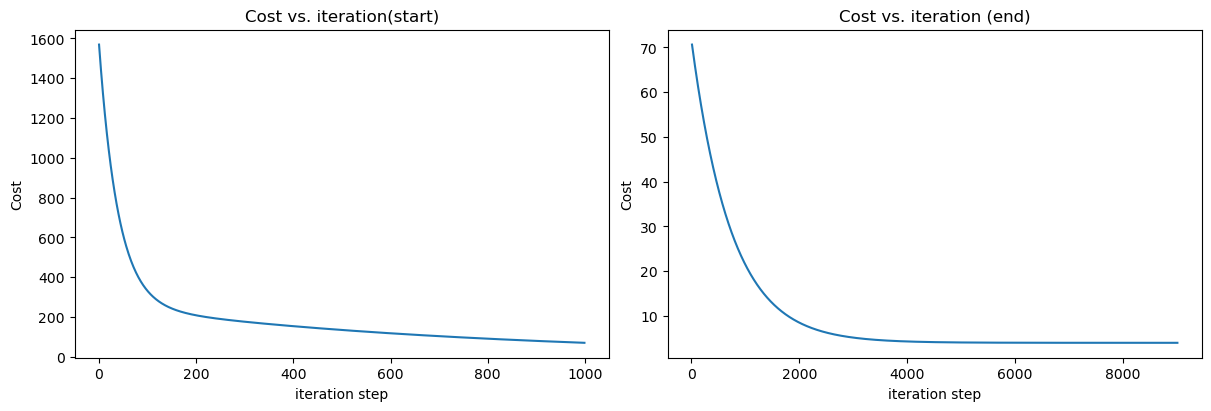

In [53]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history[:1000])
ax2.plot(10 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

In [ ]:
### Evaluation du modèle sur le jeu de validation
# Normalizing the data
X_val = normalize(X_val)
print(X_val[:4])
print(y_val[:4])
